<a href="https://colab.research.google.com/github/SvetlanaSR/testr/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%87%D0%BD%D1%8B%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D0%BD%D0%B0_AutoML_%7C_%D0%A3%D0%98%D0%98_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Устанавливаем Autokeras и фреймворк terra-ai-datasets-framework
!pip -q install autokeras terra-ai-datasets-framework

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 66.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Подключение библиотек
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import gdown

# Оценка табличных данных

In [ ]:
# Загрузка обучающих данных
URL = 'https://storage.yandexcloud.net/terraai/sources/flats.zip'
download_filename = gdown.download(URL, None, quiet = True)

In [ ]:
# Распаковка архива
!unzip -q {download_filename} -d '/content/data'

# Удаление архива
!rm -rf {download_filename}

In [ ]:
df = pd.read_csv('data/flats.csv')
df.head()

,Комнат,Станция метро,Время в пути,Пешком или на транспорте,Этаж,Всего этажей в доме,Тип дома,Балконы,Лоджии,Санузел,Тип санузла,Площадь,"Цена, тыс.руб.",Бонус агенту,Дата,Кол-во дней в экспозиции,Источник,Примечание
0,1,Шелепиха м.,12,Пешком,35,37,Монолитный,0,0,2,Не указано,64.1,19500.0,0.0,июль_2019,1.0,Привлекательные,Собственность оформлена! Ключи на руках! Опера...
1,1,Пятницкое шоссе м.,30,На транспорте,11,14,Панельный,0,1,1,Раздельный,38.4,4800.0,0.0,июль_2019,2.0,Привлекательные,Зеленоград к.1820 однокомнатная квартира общ.3...
2,1,Планерная м.,5,На транспорте,11,22,Панельный,1,0,1,Совмещенный,38.2,7990.0,0.0,июль_2019,4.0,Привлекательные,"Уютная, светлая квартира, застекленный балкон ..."
3,1,Шаболовская м.,12,Пешком,8,12,Не указано,1,0,1,Раздельный,38.0,11200.0,0.0,июль_2019,7.0,Привлекательные,"Предлагаю 1- комн квартиру, в шаговой доступно..."
4,1,Бабушкинская м.,15,Пешком,4,14,Панельный,0,0,1,Совмещенный,34.0,6250.0,0.0,июль_2019,11.0,Привлекательные,Продается хорошая 1 комнатная квартира. 1 взро...


In [ ]:
# Устанавливаем модуль подготовки датасета для задач регрессии
from terra_ai_datasets.create import DataframeRegression

# Подготавливаем датасет, используя фреймворк подготовки данных
df_regr_dataset = DataframeRegression(
    csv_path='data/flats.csv',
    train_size=0.8,
    inputs=[      # используем три входа с разными типами данных (категориальные, числовые, текстовые)
        {"columns": ["Станция метро", "Тип дома", "Пешком или на транспорте"], "type": "Categorical", "parameters": {"one_hot_encoding": True}},
        {"columns": ["Время в пути", "Этаж", "Всего этажей в доме", "Балконы", "Лоджии", "Санузел", "Площадь"], "type": "Raw", "parameters": {}},
        {"columns": ["Примечание"], "type": "Text", "parameters": {
            "max_words_count": 10000,           # объем словаря
            "mode": "Full",
            "preprocessing": "Bag of words",    # режим предобоработки текста
            "max_words": 30,                    # размер вектора
            "pymorphy": False}},                # приводить ли слова к единой форме
    ],
    output="Цена, тыс.руб.",                    # наименование целевой колонки
    preprocessing="StandardScaler"              # препроцессинг
)

08:58:19 | Датасет подготовлен к началу формирования массивов
INFO:terra_ai_datasets.creation.utils:Датасет подготовлен к началу формирования массивов


In [ ]:
df_regr_dataset.summary()

,1_Станция метро,1_Тип дома,1_Пешком или на транспорте,2_Время в пути,2_Этаж,2_Всего этажей в доме,2_Балконы,2_Лоджии,2_Санузел,2_Площадь,3_Примечание,"4_Цена, тыс.руб."
0,Орехово м.,Панельный,На транспорте,6,8,12,0,0,1,35.0,Продается уютная однокомнатная квартира с косм...,5700.000
1,Жулебино м.,Панельный,На транспорте,19,11,25,0,0,1,65.4,Внимание! Действуют СКИДКИ. Регистрация сделки...,8810.182
2,Шаболовская м.,Монолитный,Пешком,5,11,20,0,1,2,210.0,Вашему вниманию предлагается элегантная 5-комн...,78000.000
3,ВДНХ м.,Кирпичный,Пешком,12,2,5,1,0,1,31.0,"Квартира с хорошим ремонтом в кирпичном доме ,...",6900.000
4,Молодежная м.,Панельный,Пешком,10,18,22,0,0,1,40.4,Новостройка! Продается 1-комн. кв-ра площадью ...,9659.640



Кол-во примеров в train выборке: 101014
Кол-во примеров в val выборке: 25254



In [ ]:
# Создаем обучающие и проверочные выборки
df_regr_dataset.create()

08:58:19 | Формирование массивов train - Categorical - 1_Станция метро: 100%|██████████| 101014/101014 [00:07<00:00, 14306.71it/s]
08:58:26 | Формирование массивов train - Categorical - 1_Тип дома: 100%|██████████| 101014/101014 [00:08<00:00, 11446.17it/s]
08:58:35 | Формирование массивов train - Categorical - 1_Пешком или на транспорте: 100%|██████████| 101014/101014 [00:06<00:00, 15557.01it/s]
08:58:41 | Формирование массивов train - Raw - 2_Время в пути: 100%|██████████| 101014/101014 [00:07<00:00, 13153.31it/s]
08:58:49 | Формирование массивов train - Raw - 2_Этаж: 100%|██████████| 101014/101014 [00:06<00:00, 16111.52it/s]
08:58:55 | Формирование массивов train - Raw - 2_Всего этажей в доме: 100%|██████████| 101014/101014 [00:07<00:00, 13154.75it/s]
08:59:03 | Формирование массивов train - Raw - 2_Балконы: 100%|██████████| 101014/101014 [00:06<00:00, 15781.54it/s]
08:59:09 | Формирование массивов train - Raw - 2_Лоджии: 100%|██████████| 101014/101014 [00:07<00:00, 13111.24it/s]
08:

In [ ]:
# Вывод содержимого одного из примеров в обучающей выборке с указанием размерностей
inp, out = next(iter(df_regr_dataset.dataset['train']))
print(f'Вход №1 (размер: {inp["input_1"].shape}):\n {inp["input_1"]}')
print(f'Вход №2 (размер: {inp["input_2"].shape}):\n {inp["input_2"]}')
print(f'Вход №3 (размер: {inp["input_3"].shape}):\n {inp["input_3"]}')
print(f'Выход (размер: {out["output_1"].shape}):\n {out["output_1"]}')

Вход №1 (размер: (280,)):
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
Вход №1 (размер: (7,)):
 [15.  2. 15.  1.  0.  1. 45.]
Вход №1 (размер: (10000,)):
 [0 1 1 ... 0 0 0]
Выход (размер: ()):
 -0.20222391470461193


In [ ]:
# Переформатируем датасет, чтобы потом некоторые переменные сделать категориальными

df = pd.read_csv('data/flats.csv')
df = df[df['Комнат']==1]
df = df.iloc[:5000]
df["Этаж"] = 'f' + df["Этаж"].astype(str)
df["Всего этажей в доме"] = 'cf' + df["Всего этажей в доме"].astype(str)
df["Балконы"] = 'b' + df["Балконы"].astype(str)
df["Лоджии"] = 'l' + df["Лоджии"].astype(str)
df["Санузел"] = 's' + df["Санузел"].astype(str)
df.to_csv('data/flats_1.csv')

In [ ]:
from terra_ai_datasets.create import DataframeRegression

# Подготавливаем другой датасет с большим количеством категориальных переменных,
# используя фреймворк подготовки данных
df_regr_dataset = DataframeRegression(
    csv_path='data/flats_1.csv',
    train_size=0.8,
    inputs=[
        {"columns": ["Станция метро", "Тип дома", "Пешком или на транспорте", "Этаж", "Всего этажей в доме", "Балконы", "Лоджии", "Санузел"], "type": "Categorical", "parameters": {"one_hot_encoding": True}},
        {"columns": ["Время в пути", "Площадь"], "type": "Raw", "parameters": {}},
        {"columns": ["Примечание"], "type": "Text", "parameters": {
            "max_words_count": 1000,
            "mode": "Full",
            "preprocessing": "Bag of words",
            "max_words": 30,
            "pymorphy": False}},
    ],
    output="Цена, тыс.руб.",
    preprocessing="StandardScaler"
)

07:14:10 | Датасет подготовлен к началу формирования массивов
INFO:terra_ai_datasets.creation.utils:Датасет подготовлен к началу формирования массивов


In [ ]:
df_regr_dataset.summary()

,1_Станция метро,1_Тип дома,1_Пешком или на транспорте,1_Этаж,1_Всего этажей в доме,1_Балконы,1_Лоджии,1_Санузел,2_Время в пути,2_Площадь,3_Примечание,"4_Цена, тыс.руб."
0,Университет м.,Кирпичный,Пешком,f2,cf16,b0,l0,s1,10,38.0,Продается однокомнатная квартира в высотной ст...,10150.0
1,Водный стадион м.,Панельный,На транспорте,f4,cf5,b1,l0,s1,5,31.1,ДОМ ПОД РЕНОВАЦИЮ. Светлая теплая квартира. Сд...,6400.0
2,Соколиная Гора м. (МЦК),Кирпичный,Пешком,f5,cf6,b0,l1,s1,15,46.0,Продается 1-ком-я квартира. Дом построен по ин...,13450.0
3,Рассказовка м.,Панельный,Пешком,f17,cf17,b1,l0,s1,7,43.0,"Альтернатива подобрана, 1 взрослый собственник...",7100.0
4,Кантемировская м.,Панельный,Пешком,f5,cf17,b1,l0,s1,10,38.5,№1357526 Лучшее предложение на рынке!!В Южном ...,7700.0



Кол-во примеров в train выборке: 4000
Кол-во примеров в val выборке: 1000



In [ ]:
# Создаем новые обучающие и проверочные выборки
df_regr_dataset.create()

07:14:10 | Формирование массивов train - Categorical - 1_Станция метро: 100%|██████████| 4000/4000 [00:00<00:00, 12647.03it/s]
07:14:11 | Формирование массивов train - Categorical - 1_Тип дома: 100%|██████████| 4000/4000 [00:00<00:00, 13973.18it/s]
07:14:11 | Формирование массивов train - Categorical - 1_Пешком или на транспорте: 100%|██████████| 4000/4000 [00:00<00:00, 14688.03it/s]
07:14:11 | Формирование массивов train - Categorical - 1_Этаж: 100%|██████████| 4000/4000 [00:00<00:00, 13671.12it/s]
07:14:12 | Формирование массивов train - Categorical - 1_Всего этажей в доме: 100%|██████████| 4000/4000 [00:00<00:00, 14385.15it/s]
07:14:12 | Формирование массивов train - Categorical - 1_Балконы: 100%|██████████| 4000/4000 [00:00<00:00, 13584.13it/s]
07:14:12 | Формирование массивов train - Categorical - 1_Лоджии: 100%|██████████| 4000/4000 [00:00<00:00, 15136.30it/s]
07:14:12 | Формирование массивов train - Categorical - 1_Санузел: 100%|██████████| 4000/4000 [00:00<00:00, 14426.64it/s]


In [ ]:
# Вывод содержимого одного из примеров в новой обучающей выборке с указанием размерностей
inp, out = next(iter(df_regr_dataset.dataset['train']))
print(f'Вход №1 (размер: {inp["input_1"].shape}):\n {inp["input_1"]}')
print(f'Вход №2 (размер: {inp["input_2"].shape}):\n {inp["input_2"]}')
print(f'Вход №3 (размер: {inp["input_3"].shape}):\n {inp["input_3"]}')
print(f'Выход (размер: {out["output_1"].shape}):\n {out["output_1"]}')

Вход №1 (размер: (380,)):
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0]
Вход №1 (размер: (2,)):
 [10. 38.]
Вход №1 (размер: (1000,)):
 [0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 

In [ ]:
import autokeras as ak
# Создаем модель с помощью модуля AutoModel
rgr_model = ak.AutoModel(
    inputs=[ak.StructuredDataInput(), ak.StructuredDataInput(), ak.StructuredDataInput()],  # используем три входа
    outputs=[
        ak.RegressionHead(metrics=["mae"])   # блок регрессии
    ],
    max_trials=3,                            # количество моделей
)

In [ ]:
# Обучение на выборках, полученных с помощью модуля terra_ai_datasets
rgr_model.fit(
      [df_regr_dataset.X['train']['input_1'],
      df_regr_dataset.X['train']['input_2'],
      df_regr_dataset.X['train']['input_3']],
      df_regr_dataset.Y['train']['output_1'],
      epochs=20,
      validation_data=(
          [df_regr_dataset.X['val']['input_1'],
          df_regr_dataset.X['val']['input_2'],
          df_regr_dataset.X['val']['input_3']],
          df_regr_dataset.Y['val']['output_1'])
    )

Trial 3 Complete [00h 22m 25s]
val_loss: 1.1659432649612427

Best val_loss So Far: 0.5929948687553406
Total elapsed time: 01h 08m 25s
Epoch 1/20
125/125 [==============================] - 62s 298ms/step - loss: 0.5645 - mae: 0.4491 - val_loss: 0.9456 - val_mae: 0.4886
Epoch 2/20
125/125 [==============================] - 27s 221ms/step - loss: 0.4145 - mae: 0.4073 - val_loss: 0.9666 - val_mae: 0.5244
Epoch 3/20
125/125 [==============================] - 22s 176ms/step - loss: 0.3874 - mae: 0.3893 - val_loss: 0.9343 - val_mae: 0.5134
Epoch 4/20
125/125 [==============================] - 23s 180ms/step - loss: 0.3746 - mae: 0.3797 - val_loss: 0.8700 - val_mae: 0.4727
Epoch 5/20
125/125 [==============================] - 23s 184ms/step - loss: 0.3667 - mae: 0.3748 - val_loss: 0.8024 - val_mae: 0.4207
Epoch 6/20
125/125 [==============================] - 23s 188ms/step - loss: 0.3630 - mae: 0.3736 - val_loss: 0.8492 - val_mae: 0.4652
Epoch 7/20
125/125 [==============================] - 24

In [ ]:
model = rgr_model.export_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 380)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 1000)]               0         []                            
                                                                                                  
 multi_category_encoding (M  (None, 380)                  0         ['input_1[0][0]']             
 ultiCategoryEncoding)                                                                        

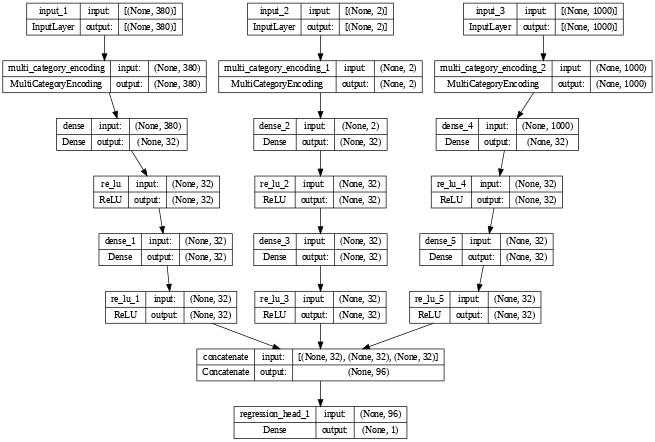

In [ ]:
# Визуализация структуры модели
from tensorflow.keras.utils import plot_model
plot_model(model, dpi=50, show_shapes=True)

In [ ]:
# Вывод результатов обучения на основании разницы предсказанной и реальной цены
inp, out, pred = next(df_regr_dataset.evaluate_on_model(model, batch_size=10))
data = []
for r_pr, p_pr in zip(out["output_1"], pred):
    real_price = df_regr_dataset.preprocessing['4_Цена, тыс.руб.'].inverse_transform(r_pr.numpy().reshape(-1, 1))
    pred_price = df_regr_dataset.preprocessing['4_Цена, тыс.руб.'].inverse_transform(p_pr.reshape(-1, 1))
    diff = pred_price[0][0] - real_price[0][0]
    data.append([real_price[0][0], pred_price[0][0], diff])

df = pd.DataFrame(data, columns=['Настоящая цена', 'Предсказанная цена', 'Разница'])
display(df)

1/1 [==============================] - 0s 207ms/step


,Настоящая цена,Предсказанная цена,Разница
0,13800.0,14812.662109,1012.662109
1,15300.0,11561.738281,-3738.261719
2,7900.0,7244.098145,-655.901855
3,5990.0,8476.212891,2486.212891
4,9400.0,9102.629883,-297.370117
5,3200.0,5003.107910,1803.107910
6,9291.4,8635.590820,-655.809180
7,23000.0,16931.501953,-6068.498047
8,5574.0,4230.110352,-1343.889648
9,17051.0,14206.764648,-2844.235352


# Предсказание временных рядов

In [ ]:
# Загружаем датасет с котировками акций ГАЗПРОМа
gdown.download('https://storage.yandexcloud.net/terraai/sources/shares.zip', None, quiet=True)
!unzip -q shares.zip -d /content/shares

## модуль auto-ts

In [ ]:
# Устанавливаем модуль auto-ts
!pip -q install auto-ts pmdarima --no-deps --ignore-installed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.3 MB/s eta 0:00:00


In [ ]:
# Импортируем необходимые библиотеки

import numpy as np
import pandas as pd
from auto_ts import auto_timeseries
from auto_ts import print_ts_model_stats
import matplotlib.pyplot as plt

Imported auto_timeseries version:0.0.71. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [ ]:
# Вывод датасета

df = pd.read_csv('shares/GAZP_1d.csv')
print(df.shape)
df.head()

(3698, 9)


,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,GAZP,D,20060123,0,239.0,239.00,218.49,218.89,5078252
1,GAZP,D,20060124,0,220.5,224.68,219.66,224.00,8971078
2,GAZP,D,20060125,0,225.2,231.00,225.00,228.38,15467697
3,GAZP,D,20060126,0,228.9,229.41,223.51,224.47,7585458
4,GAZP,D,20060127,0,226.2,231.50,224.00,228.75,12719299


In [ ]:
# Переформатирование датасета, исключение ненужных колонок

df = df[['<DATE>', '<OPEN>', '<HIGH>','<LOW>','<CLOSE>']]
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d')
df.head()

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,2006-01-23,239.0,239.00,218.49,218.89
1,2006-01-24,220.5,224.68,219.66,224.00
2,2006-01-25,225.2,231.00,225.00,228.38
3,2006-01-26,228.9,229.41,223.51,224.47
4,2006-01-27,226.2,231.50,224.00,228.75


Start of Fit.....
    Target variable given as = <CLOSE>
Start of loading of data.....
    Inputs: ts_column = <DATE>, sep = ,, target = ['<CLOSE>']
    Using given input: pandas dataframe...
    <DATE> column exists in given train data...
    train data shape = (3500, 4)
Alert: Could not detect strf_time_format of <DATE>. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


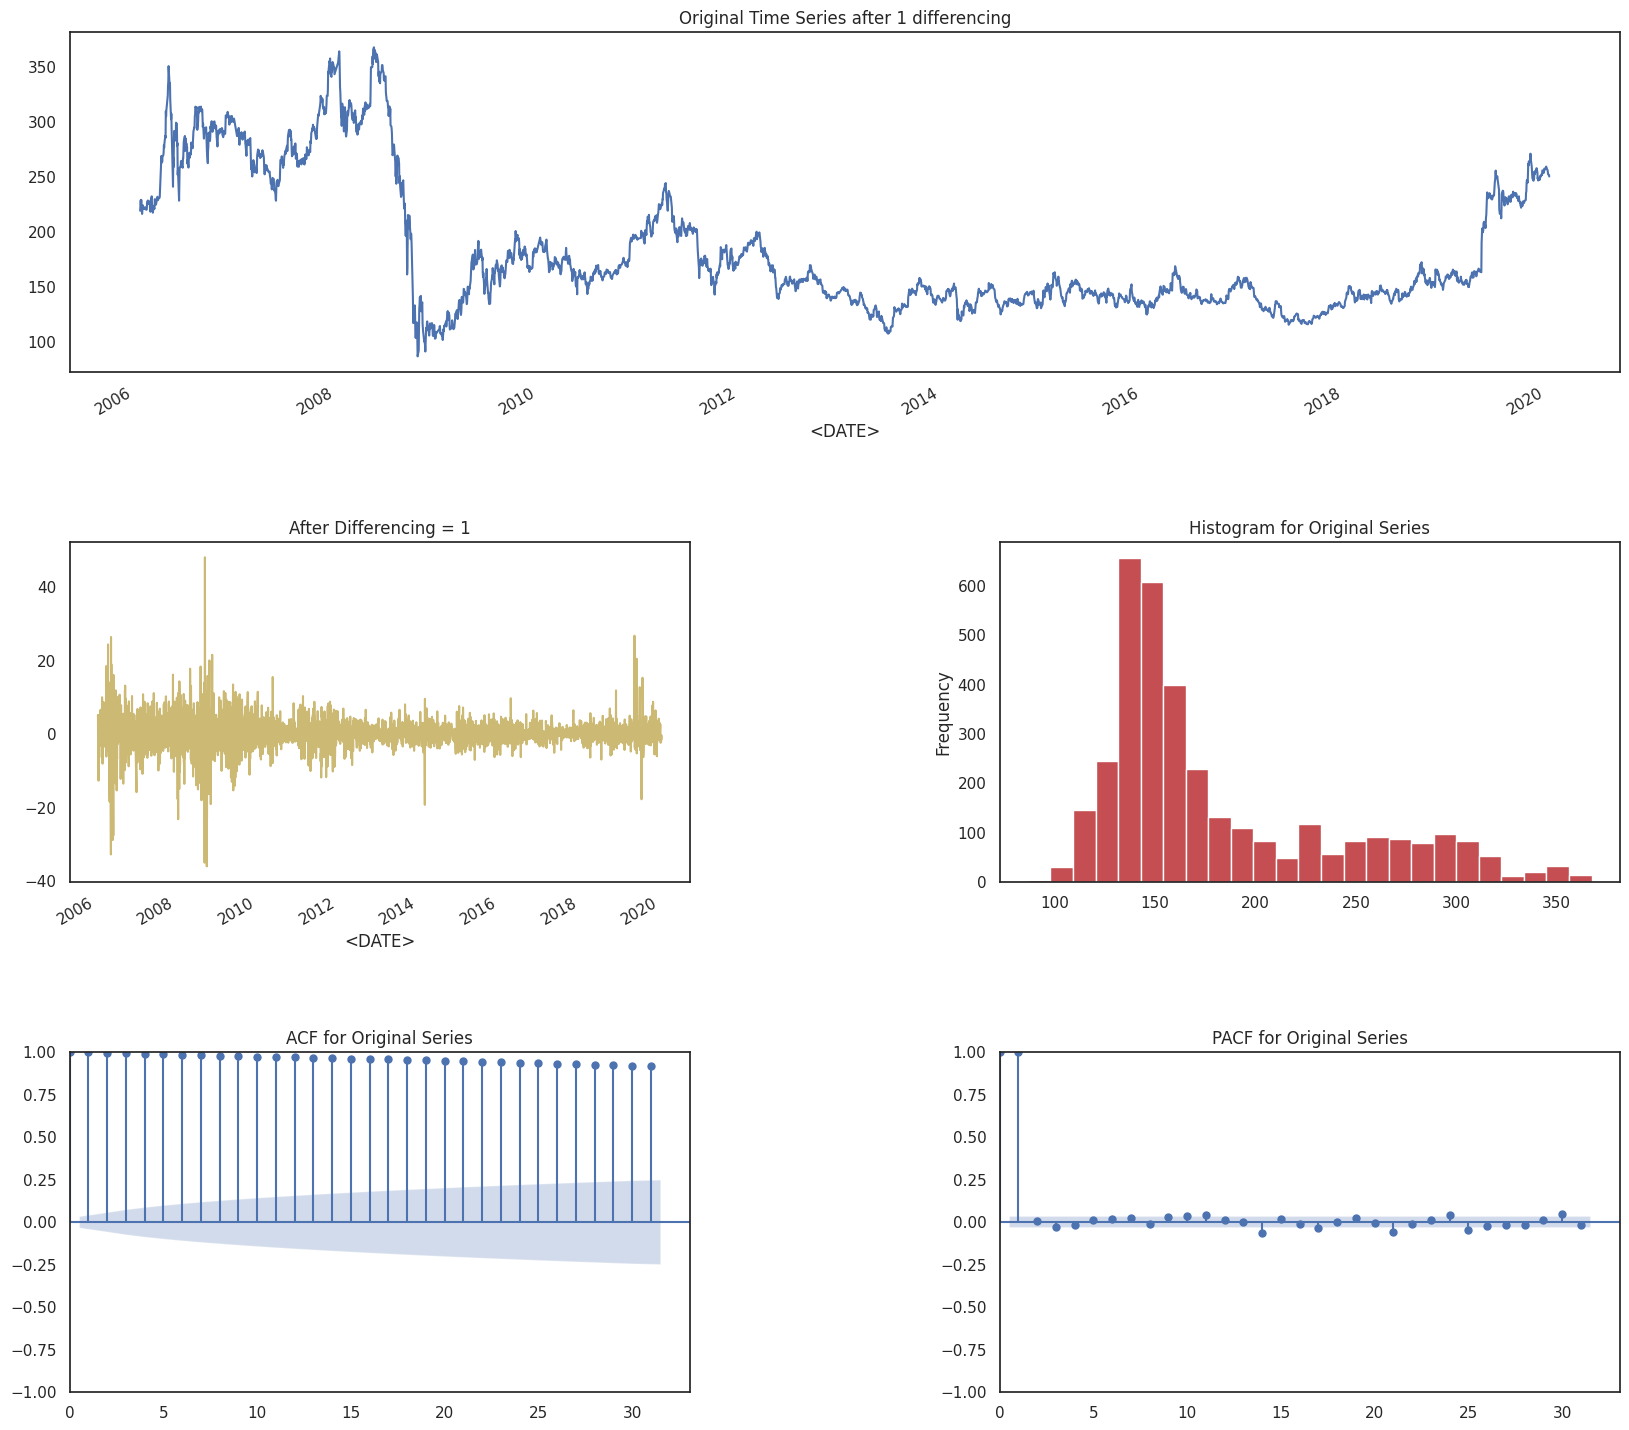

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/0yfbfsuy.json


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(3500, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 3475 Test Shape: 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/twjo_13n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46467', 'data', 'file=/tmp/tmpw9ut5zjb/0yfbfsuy.json', 'init=/tmp/tmpw9ut5zjb/twjo_13n.json', 'output', 'file=/tmp/tmpw9ut5zjb/prophet_modelf_jpdcxd/prophet_model-20230810160414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
16:04:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:04:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/niz0q0yn.json


    RMSE = 41.96
    Std Deviation of actuals = 0.80
    Normalized RMSE (as pct of std dev) = 5239%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 3480 Test Shape: 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/2sup5zko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88457', 'data', 'file=/tmp/tmpw9ut5zjb/niz0q0yn.json', 'init=/tmp/tmpw9ut5zjb/2sup5zko.json', 'output', 'file=/tmp/tmpw9ut5zjb/prophet_modelprb_vuik/prophet_model-20230810160416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
16:04:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:04:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/sjl5scz5.json


    RMSE = 42.18
    Std Deviation of actuals = 0.85
    Normalized RMSE (as pct of std dev) = 4976%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 3485 Test Shape: 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/erh2gp94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65954', 'data', 'file=/tmp/tmpw9ut5zjb/sjl5scz5.json', 'init=/tmp/tmpw9ut5zjb/erh2gp94.json', 'output', 'file=/tmp/tmpw9ut5zjb/prophet_modelfck867n2/prophet_model-20230810160418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
16:04:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:04:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/vjqs5un3.json


    RMSE = 38.91
    Std Deviation of actuals = 1.51
    Normalized RMSE (as pct of std dev) = 2585%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 3490 Test Shape: 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/g2rexzgd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43482', 'data', 'file=/tmp/tmpw9ut5zjb/vjqs5un3.json', 'init=/tmp/tmpw9ut5zjb/g2rexzgd.json', 'output', 'file=/tmp/tmpw9ut5zjb/prophet_model_8z5gbs2/prophet_model-20230810160421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
16:04:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:04:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/ryzbdzq_.json


    RMSE = 41.69
    Std Deviation of actuals = 1.57
    Normalized RMSE (as pct of std dev) = 2657%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 3495 Test Shape: 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/0zqs3jre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65195', 'data', 'file=/tmp/tmpw9ut5zjb/ryzbdzq_.json', 'init=/tmp/tmpw9ut5zjb/0zqs3jre.json', 'output', 'file=/tmp/tmpw9ut5zjb/prophet_modeljcswmnmh/prophet_model-20230810160425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
16:04:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:04:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


    RMSE = 34.23
    Std Deviation of actuals = 2.04
    Normalized RMSE (as pct of std dev) = 1679%
Cross Validation window: 5 completed


DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/l0xv4gsx.json



-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 39.12
    MSE (Mean Squared Error = 1592.60
    MAPE (Mean Absolute Percent Error) = 16%
    RMSE (Root Mean Squared Error) = 39.9074
    Normalized RMSE (MinMax) = 316%
    Normalized RMSE (as Std Dev of Actuals)= 1148%
Time Taken = 14 seconds


DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9ut5zjb/f0webstu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80194', 'data', 'file=/tmp/tmpw9ut5zjb/l0xv4gsx.json', 'init=/tmp/tmpw9ut5zjb/f0webstu.json', 'output', 'file=/tmp/tmpw9ut5zjb/prophet_modelpn694tyi/prophet_model-20230810160427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
16:04:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:04:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 3475 Test Shape: 5

    Finding the best parameters using AutoArima:
    Using smaller parameters for larger dataset with greater than 1000 samples

Best model is a Seasonal SARIMAX(0,1,0)*(0,0,0,12), aic = 19844.668
Static Forecasts:
    RMSE = 1.70
    Std Deviation of Actuals = 0.80
    Normalized RMSE (as pct of std dev) = 212.8%

Fold Number: 2 --> Train Shape: 3480 Test Shape: 5

    Finding the best parameters using AutoArima:
    Using smaller parameters for larger dataset with greater than 1000 samples

Best model is a Seasonal SARIMAX(0,1,0)*(0,0,0,12), aic = 19868.956
Static Forecasts:
    RMSE = 3.58
    Std Deviation of Actuals = 0.85
    Normalized RMSE (as pct of std dev) = 422.5%

Fold Number: 3 --> Train Shape: 3485 Test Shape: 5

    Finding the

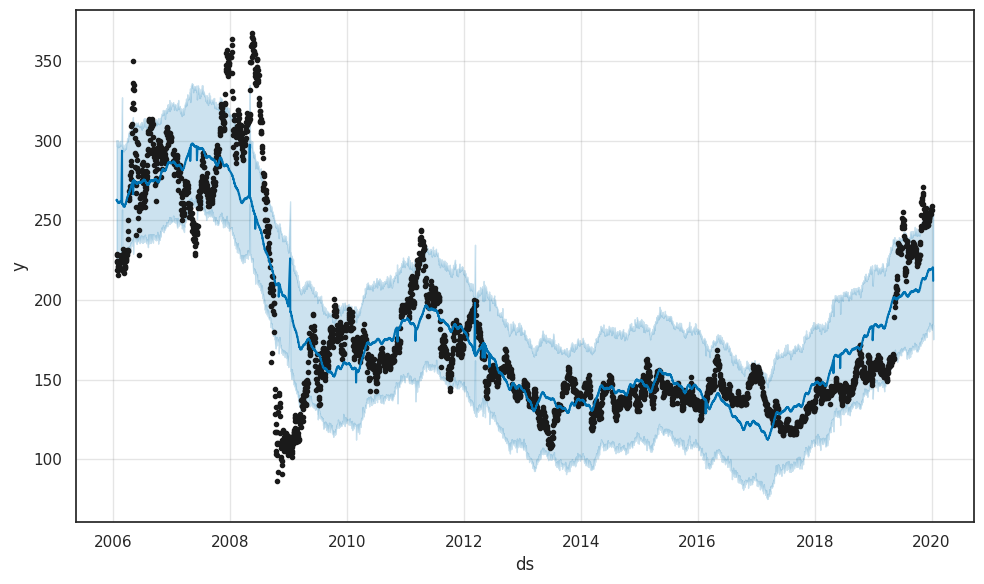

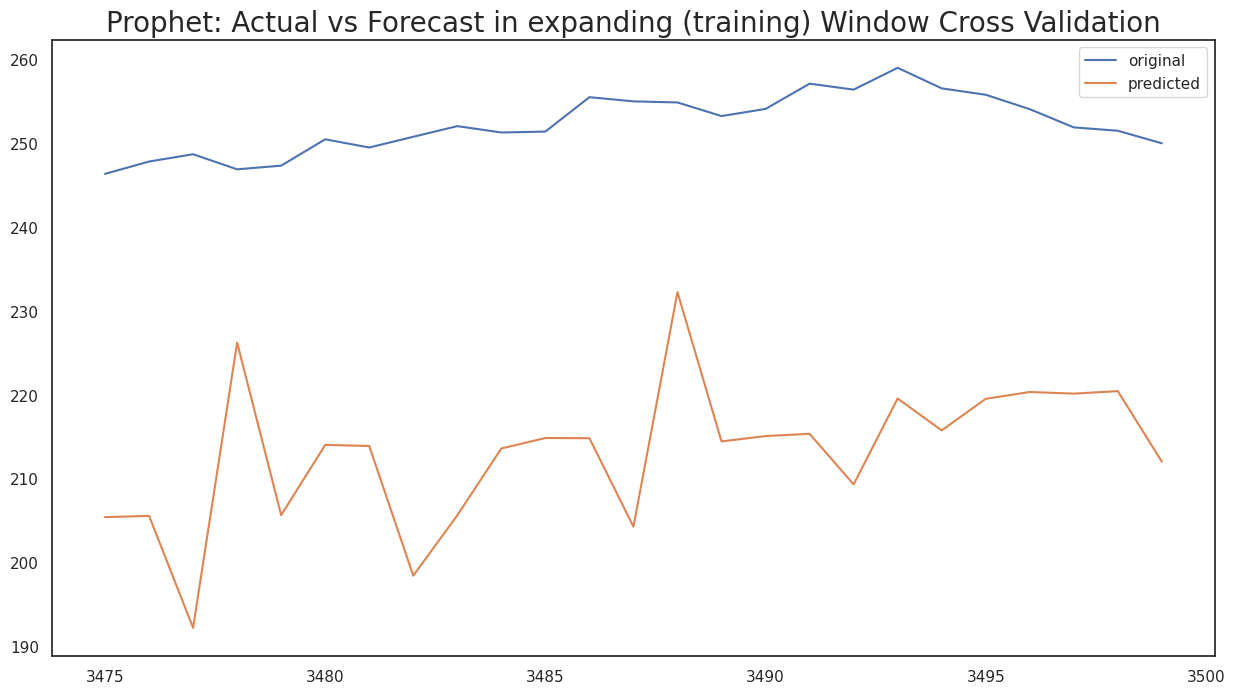

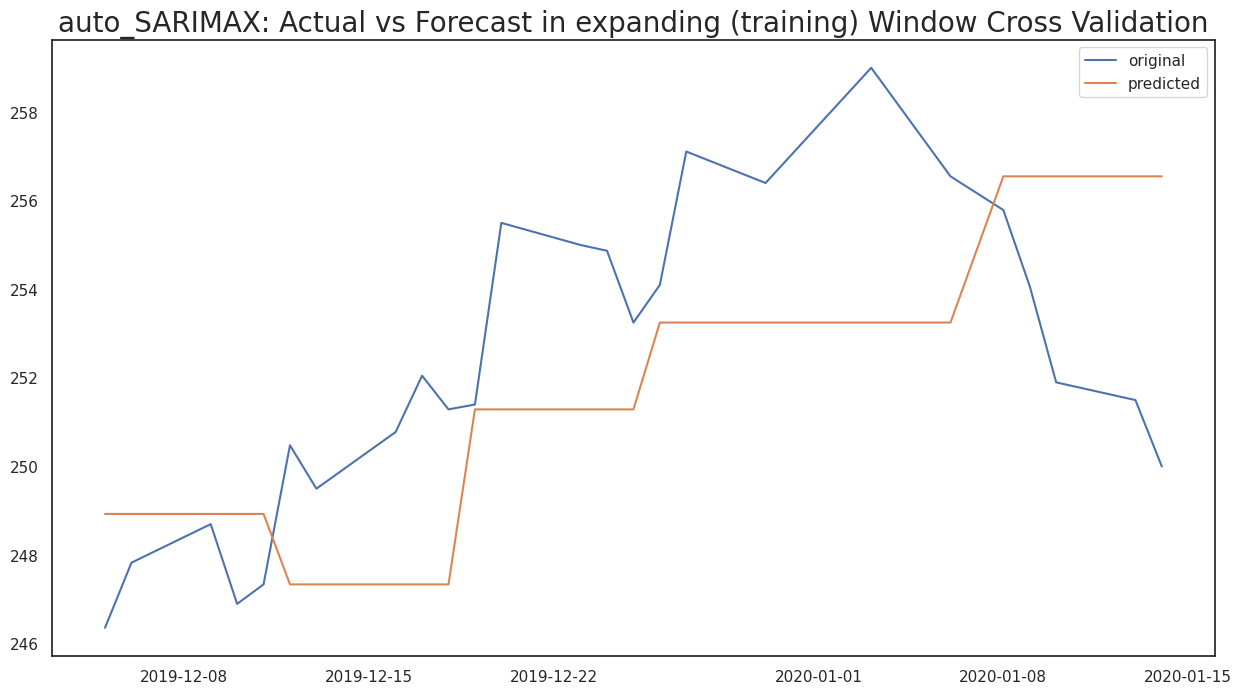

In [ ]:
# Создание модели
model = auto_timeseries(score_type='rmse',   # функция потерь
                        time_interval='D',   # дневной интервал
                        model_type='best',   # сохраняем лучшую модель
                        verbose=1)

# Создание обучающей и проверочной выборок
train, val = df.iloc[:3500], df.iloc[3500:]

# Обучение модели
model.fit(traindata=train,      # на выборке train
          ts_column='<DATE>',   # колонка с временными отсчетами
          target='<CLOSE>')     # целевая колонка

In [ ]:
# Вывод параметров лучших моделей
model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,3.303274
0,Prophet,39.792650
2,ML,inf


Predicting using test dataframe as input for auto_SARIMAX model


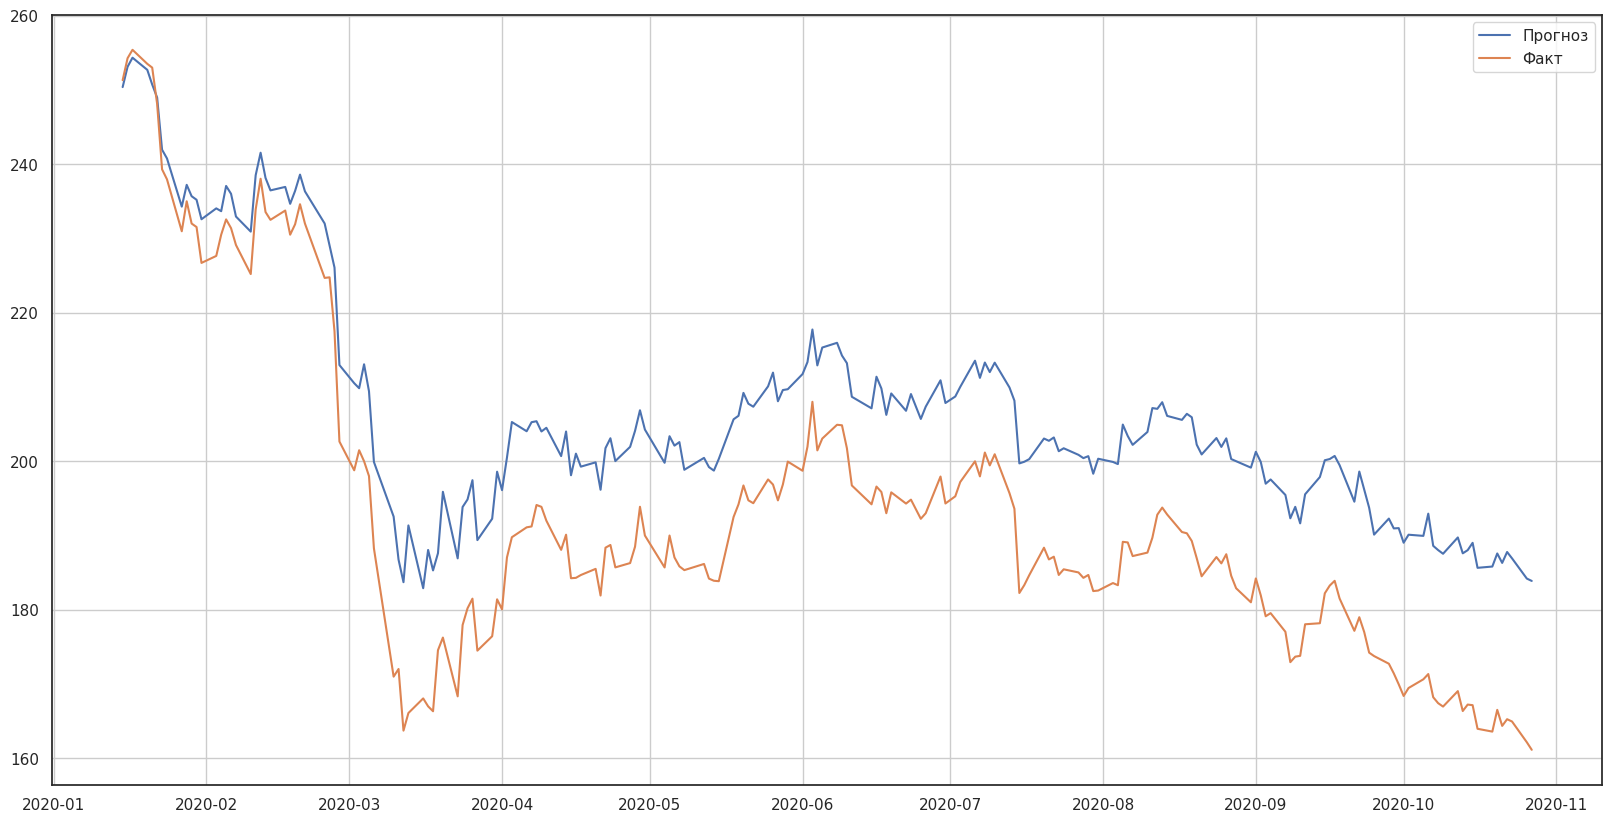

In [ ]:
# ТЕСТ
pred = model.predict(val, model='auto_SARIMAX')['yhat'].to_numpy(float)
plt.figure(figsize=(20, 10))
plt.plot(val['<DATE>'], pred, label='Прогноз')
plt.plot(val['<DATE>'], val['<CLOSE>'], label='Факт')
plt.legend()
plt.grid()
plt.show()